# Proceso de ETL datos CNC

Se inicia visualizando la data etiquetada como 2012

In [2]:
import pandas as pd 

path_2012 = 'Data_CNC/d2012---copia.xlsx'
df2012 = pd.read_excel(path_2012)

Lectura de archivo de 2013

In [3]:
path_2013 = 'Data_CNC/d2013---copia.xlsx'
df2013 = pd.read_excel(path_2013)

Lectura de archivo 2016

In [4]:
path_2016 = 'Data_CNC/d2016---copia.xlsx'
df2016 = pd.read_excel(path_2016)

Lectura de archivo 2018

In [5]:
path_2018 = 'Data_CNC/d2018---copia.xlsx'
df2018 = pd.read_excel(path_2018)

Lectura de archivo 2023

In [6]:
path_2023 = 'Data_CNC/d2023---copia.xlsx'
df2023 = pd.read_excel(path_2023)

In [7]:
for i in (df2023.columns):
    print (i, df2023.loc[0,i])

ID 2023
ESTUDIO CC913901_AD_23_HOGAR
ENTREVISTADOR 27848
REGISTRO 1877
FECHAINI 2023-04-04 00:00:00
HORAINI 14:47:01
FECHAFIN 2023-04-04 00:00:00
HORAFIN 16:14:40
DURACION 5257
TELEFONO nan
EMAIL nan
ID_CONTACTO 1
ESTADO 6
IDIOMA 1
IDCOORD ggutierrez
GPSVAL 1
GPSALT 9219000244140620.0
GPSLONG 73.1366221
GPSLAT 7.1137993
GPSPRECISION 14.0
IDGUID 68A6DDD4423C4F71BA811C93CA1D061C
IDGUIDCONTACTO nan
IDGUIDREC F528C6073E4C44A9A0DE4B8935316B41
IDAPK 4.4.2142.1
IDBROWSER Chrome
IDDEVICE 6ad3714b108c5ad7
IDIP nan
IDMODE E
IDMODEL SMT285M
IDSCREEN 601;962;V
IDSO Android
IDPPI 12780000686645500
IDVERBROWSER 95
IDVERSO 5.1.1
IDVERSION 16
IDUSUARIO 63544993
TIPO_ENCUESTA 1
TIPO 3
AUX99_1 1
IDEND 1
N_ENCUESTA 764678
VERSION 16
GPSE 1
LONG_1 73.1366221
LAT_1 7.1137993
VERIFICA 1
FOTO nan
REGIONAL 5
PB1 1
ID_MANZANA 308055
ID_MANZ_AUX 308055
AUX99 1
CODDANE 68001105260308.0
POINT_X 73.1365642371
POINT_Y 7.11397987518
BAN 1.0
SECTOR 526
SECCION 3
MANZANA 8
ST_CARTOG 3
CIU 8.0
CONTACTO 1
ESTRATO_BASE n

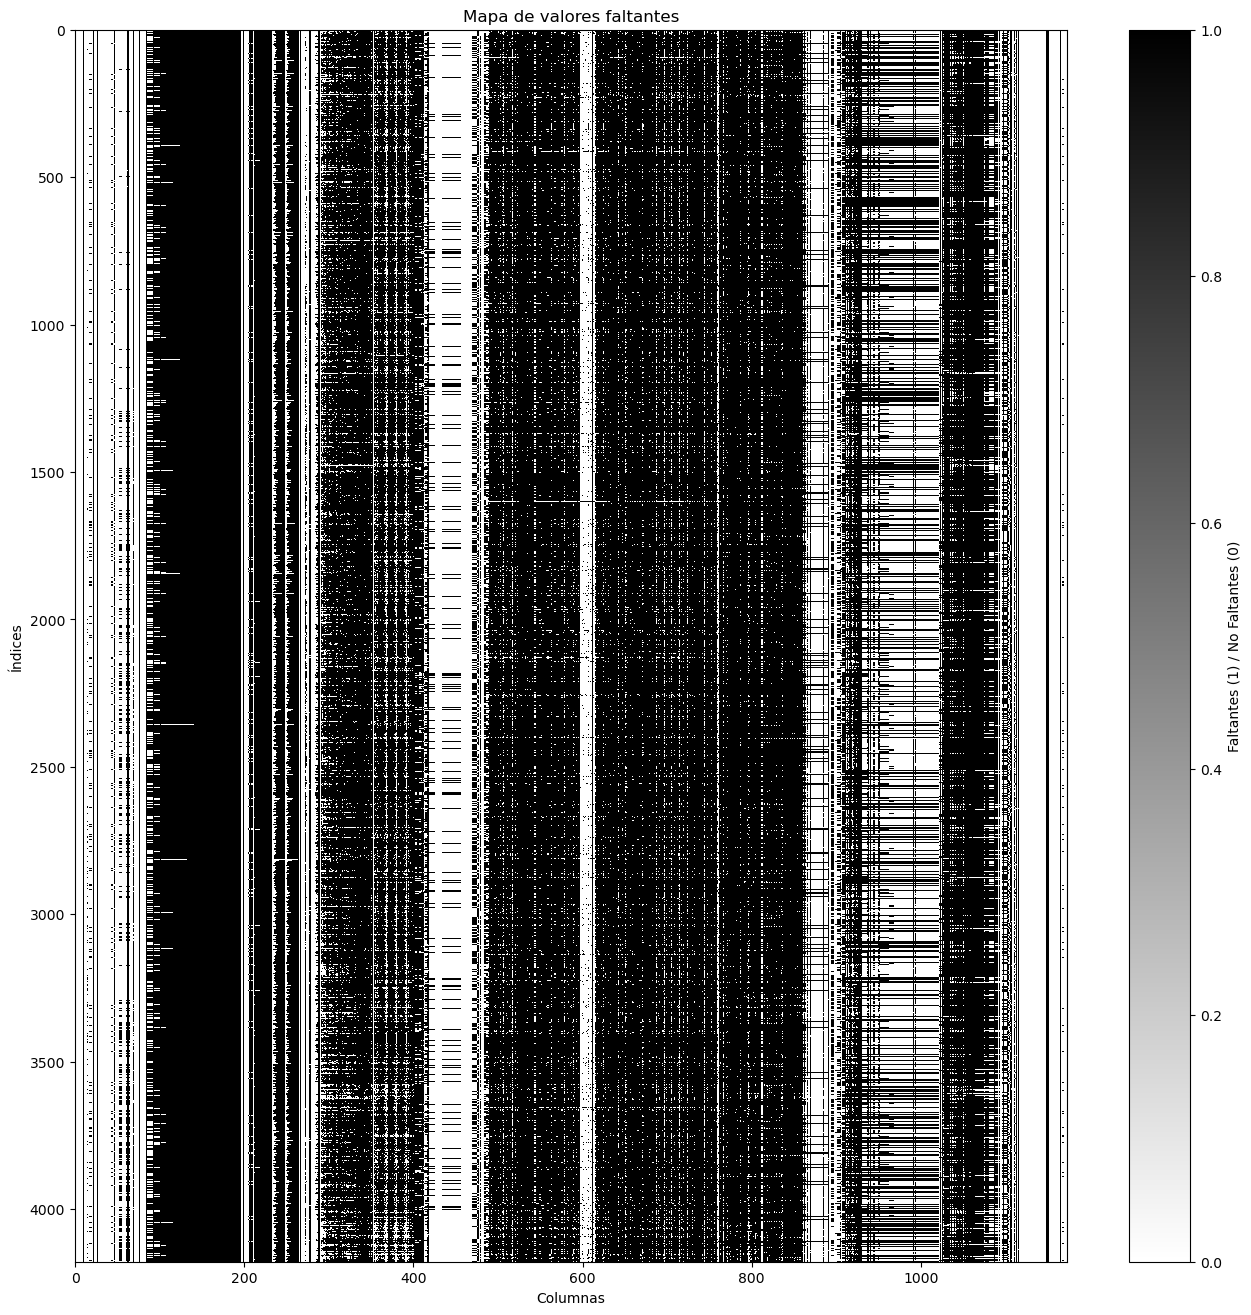

In [11]:
import matplotlib.pyplot as plt
missing_map = df2023.isnull()

# Dibujar el gráfico
plt.figure(figsize=(16, 16))
plt.imshow(missing_map, aspect='auto', cmap='binary', interpolation='none')
plt.colorbar(label='Faltantes (1) / No Faltantes (0)')
plt.xlabel("Columnas")
plt.ylabel("Índices")
plt.title("Mapa de valores faltantes")
plt.show()